1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$



In [1]:
import numpy as np
import numpy.random as npr
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt

0.47298583148997897


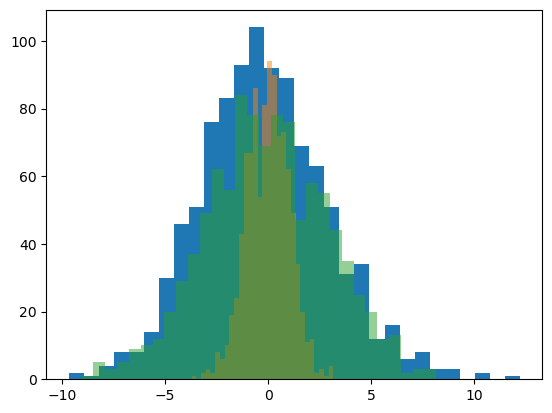

In [2]:
npr.seed(12) #for reproducibility
N=1000    #dataset size
x1=npr.normal(0,1,N)
x2=npr.normal(0,3,N)+x1
x3=2*x1 + x2
print(x1[0])

fig,ax = plt.subplots()
ax.hist(x2, bins=30)
ax.hist(x1, alpha=0.5, bins=30)
ax.hist(npr.normal(0,3,N), alpha=0.5, bins=30)
plt.show()

* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset


In [3]:
#matrix of dataset
m=[x1,x2,x3]
#covariance matrix
c=np.cov(m)
print('Covariance matrix: \n',c)
l,V= la.eig(c)
l=l.real

print('eigenvalues: \n',l)
print('eigenvectors: \n',V)

Covariance matrix: 
 [[ 1.05403981  1.05668737  3.16476699]
 [ 1.05668737  9.49404966 11.60742439]
 [ 3.16476699 11.60742439 17.93695837]]
eigenvalues: 
 [ 2.64698040e+01 -8.54583233e-16  2.01524381e+00]
eigenvectors: 
 [[-0.12503097 -0.81649658  0.56364935]
 [-0.56529568 -0.40824829 -0.71678039]
 [-0.81535762  0.40824829  0.41051831]]


* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result


In [4]:
U, spectrum, Vt = la.svd(c)

print('U: \n',U)
print('spectrum: \n',spectrum)
print('Vt: \n',Vt)

U: 
 [[-0.12503097  0.56364935 -0.81649658]
 [-0.56529568 -0.71678039 -0.40824829]
 [-0.81535762  0.41051831  0.40824829]]
spectrum: 
 [2.64698040e+01 2.01524381e+00 5.67219143e-16]
Vt: 
 [[-0.12503097 -0.56529568 -0.81535762]
 [ 0.56364935 -0.71678039  0.41051831]
 [ 0.81649658  0.40824829 -0.40824829]]


* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.


In [5]:
l_percent=l*100/l.sum()
l_percent=[np.round(x,5) for x in l_percent]
print('percent: ',(l_percent))
#one of the eigenvalues is holding most of the weight. 
#To reduce the dimensionality I have to rotate the data, and then set to zero x3.

percent:  [92.92526, -0.0, 7.07474]


* Redefine the data in the basis yielded by the PCA procedure

In [6]:
#setting the columns in the right order
l_order= l.argsort()[::-1]
l_ordered=l[l_order]
V_ordered = V[:, l_order]

print('eigenvalues: \n',l_ordered)
print('eigenvectors: \n',V_ordered)

eigenvalues: 
 [ 2.64698040e+01  2.01524381e+00 -8.54583233e-16]
eigenvectors: 
 [[-0.12503097  0.56364935 -0.81649658]
 [-0.56529568 -0.71678039 -0.40824829]
 [-0.81535762  0.41051831  0.40824829]]


In [7]:
#FINALLY ROTATION!
Xp=np.dot(V_ordered.T,m)

#check for dimension
#print(np.size(Xp,axis=1)) #3 columns of length 1000.

#Xp[2,:]=0
#check
#print(Xp[:,:10])


* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

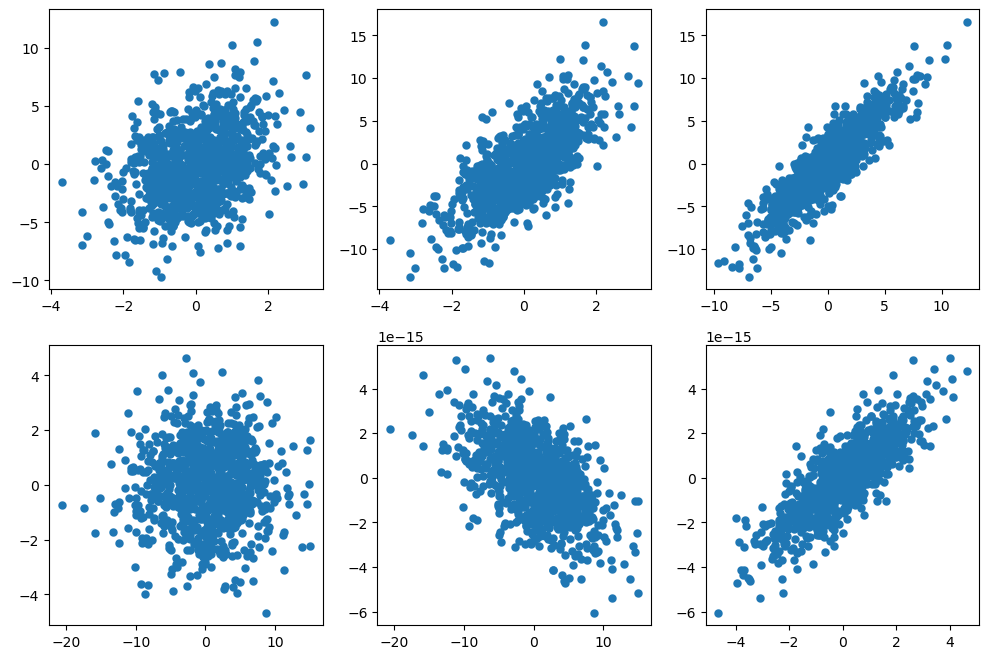

In [8]:
import matplotlib.pyplot as plt
#plotting all the scatter plots.
plots=[[0,1],[0,2],[1,2]]

#Remember that our original data is m=[x1,x2,x3] while the new data is Xp=[x1_rot,x2_rot,0]
#print(m[0][:3])
#print(Xp[0,:3])

fig,ax=plt.subplots(2,3,figsize=(12,8))
for j in range(3):
    ax[0,j].scatter(x=m[plots[j][0]],y=m[plots[j][1]],linewidths=0.05)
    ax[1,j].scatter(x=Xp[plots[j][0]],y=Xp[plots[j][1]],linewidths=0.05)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

In [9]:
m_df=np.array(m)
df=pd.DataFrame(m_df.reshape(N,3),columns=['x1','x2','x3'])
df.head(10)

,x1,x2,x3
0,0.472986,-0.681426,0.242439
1,-1.700736,0.753143,-1.534721
2,0.005127,-0.120228,-0.806982
3,2.871819,-0.597823,0.472457
4,1.095956,-1.215169,1.342356
5,-0.122150,1.012515,-0.913869
6,-1.029530,1.209796,0.501872
7,0.138846,0.640761,0.527333
8,-1.154360,-2.213333,-1.681757
9,-1.788094,-2.218535,-0.647431


In [10]:
for i in range(10):
    xi=npr.normal(loc=npr.uniform(-0.5,0.5,size=1),scale=npr.uniform(1/50,3/50,size=1), size=N)
    print(i+4)
    index='x'+str(i+4)
    df[index]=xi
df.head(10)

4
5
6
7
8
9
10
11
12
13


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.472986,-0.681426,0.242439,0.281043,-0.282813,-0.278222,0.432058,-0.162210,-0.316038,-0.269548,-0.125767,-0.109855,0.011754
1,-1.700736,0.753143,-1.534721,0.339598,-0.467480,-0.263901,0.343294,-0.134304,-0.292695,-0.287193,-0.160207,-0.141526,0.008513
2,0.005127,-0.120228,-0.806982,0.435806,-0.430477,-0.290711,0.333433,-0.142083,-0.267929,-0.460491,-0.091066,-0.119873,-0.008578
3,2.871819,-0.597823,0.472457,0.337079,-0.415134,-0.307375,0.312268,-0.138459,-0.308148,-0.348288,-0.136657,-0.109379,-0.031869
4,1.095956,-1.215169,1.342356,0.349280,-0.401746,-0.294388,0.373136,-0.134068,-0.186871,-0.404276,-0.054792,-0.060470,-0.016124
5,-0.122150,1.012515,-0.913869,0.371686,-0.416199,-0.228927,0.367109,-0.154318,-0.313373,-0.499913,-0.065652,-0.039757,0.005486
6,-1.029530,1.209796,0.501872,0.406856,-0.415544,-0.269179,0.402058,-0.106528,-0.348025,-0.518584,-0.027224,-0.108865,-0.022342
7,0.138846,0.640761,0.527333,0.284493,-0.372224,-0.268850,0.364206,-0.097199,-0.270093,-0.364575,-0.123239,-0.171400,-0.034229
8,-1.154360,-2.213333,-1.681757,0.311690,-0.466792,-0.282339,0.378212,-0.112563,-0.266127,-0.361734,-0.059490,-0.144437,-0.074272
9,-1.788094,-2.218535,-0.647431,0.329621,-0.410144,-0.311094,0.337485,-0.142359,-0.276600,-0.516482,-0.096521,-0.162741,-0.059895


Repeat the PCA procedure and compare the results with what you obtained before

In [11]:
c2=np.cov(df.T)
l2,V2= la.eig(c2)
l2=l2.real

print('eigenvalues: \n',l2)


l2_percent=l2*100/l2.sum()
l2_percent=[np.round(x,5) for x in l2_percent]
print('percent: ',l2_percent)



eigenvalues: 
 [8.93033167e+00 9.94373481e+00 9.62895592e+00 2.97165766e-03
 4.19445990e-04 4.77646632e-04 2.00310696e-03 1.96399868e-03
 1.91153595e-03 1.28765312e-03 1.03539679e-03 1.20726257e-03
 1.14083889e-03]
percent:  [31.31533, 34.86896, 33.76515, 0.01042, 0.00147, 0.00167, 0.00702, 0.00689, 0.0067, 0.00452, 0.00363, 0.00423, 0.004]


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [12]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2025-01-09 10:33:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: ‘/home/teobaldo/data/magic04.data.2’

magic04.data.2          [           <=>      ]   1,41M   305KB/s    in 4,7s    

2025-01-09 10:33:27 (305 KB/s) - ‘/home/teobaldo/data/magic04.data.2’ salvato [1477391]

--2025-01-09 10:33:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: ‘/home/teobaldo/data/magic04.names.2’

magic04.names.2       